In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/03&04_17_VSE.csv'
df_orig = pd.read_csv(file_path, encoding='cp1251', sep=";", thousands=' ', decimal=',')


Mounted at /content/drive


In [3]:
df = df_orig
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691539 entries, 0 to 691538
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Дата                      691539 non-null  object 
 1   ДатаДоставки              690913 non-null  object 
 2   НомерЗаказаНаСайте        691535 non-null  object 
 3   НовыйСтатус               691539 non-null  object 
 4   СуммаЗаказаНаСайте        691539 non-null  int64  
 5   СуммаДокумента            691539 non-null  float64
 6   МетодДоставки             691539 non-null  object 
 7   ФормаОплаты               691539 non-null  object 
 8   Регион                    686397 non-null  object 
 9   Группа2                   616853 non-null  object 
 10  Группа3                   616853 non-null  object 
 11  Группа4                   585914 non-null  object 
 12  Тип                       691539 non-null  object 
 13  Номенклатура              691539 non-null  o

In [4]:
df

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12098,12247.0,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680.0,680.0,172.00,3,2017,NaN,Возврат,Москва,508.00,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379.0,379.0,209.80,3,2017,23111,Доставлен,Регионы,169.20,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3325.0,3325.0,1149.00,3,2017,23111,Доставлен,Регионы,2176.00,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4998,4998.0,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330.0,330.0,166.96,3,2017,NaN,Доставлен,Москва,163.04,0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199.0,199.0,79.00,3,2017,23111,Доставлен,Регионы,120.00,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,17.04.2017 9:54,24.05.2017 0:00,4411156_TR,Принят в ПВЗ,3240,3240.0,Магазины,Безналичная,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ КИТАЙ,КГТ,"BABYHIT, КОЛЯСКА (син/черн)",КГТ,Нет,NaN,1,3240.0,3240.0,2700.00,4,2017,23111,В процессе,Регионы,540.00,0,0,1,1,17.04.2017 0:00,55574952-51535652495475,guest_103117_gu28@workmail.ru,Гость,IDL00040855553,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1377.0,Магазины,Безналичная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"TOMY LAMAZE, КНИЖКА- шуршалка Пират Пит",МГТ,Нет,NaN,1,464.0,464.0,324.80,4,2017,GL0285876,Доставлен,Москва,139.20,49,49,2,1,17.04.2017 0:00,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, НАСАДКА для зубной щетки SonicPulsa...",МГТ,Нет,NaN,1,249.0,249.0,207.00,4,2017,GL0285876,Доставлен,Регионы,42.00,0,0,1,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, ЩЕТКА зубная эл. SonicPulsar CS-562...",МГТ,Нет,NaN,1,849.0,849.0,705.00,4,2017,GL0285876,Доставлен,Регионы,144.00,0,0,2,1,17.04.2017 0:00,55575448-495649

In [5]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| Дата                     |          28887 |             0 |            0 |         0   | object      |
| ДатаДоставки             |            107 |             0 |          626 |         0.1 | object      |
| НомерЗаказаНаСайте       |         178418 |             0 |            4 |         0   | object      |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |          14316 |             6 |            0 |         0   | int64       |
| СуммаДокумента           |          14747 |         25772 |            0 |         0   | float64     |
| МетодДоставки            |              7 |             0 |            0 |         0   | object      |
| ФормаОплаты              |              2 |          

In [8]:
DROP_ALWAYS = [
    'ID_SKU', 'ЭлектроннаяПочта_new', 'Клиент', 'ПВЗ_код',
    'ГородМагазина', 'МагазинЗаказа', 'Маржа', 'ЦенаЗакупки',
    'НомерСтроки', 'OneClick',           # тех-ID
    'МетодДоставки',                     # удаляем delivery-фичи
    'Дата', 'ДатаДоставки', 'ДатаЗаказаНаСайте',
    'МесяцДатыЗаказа', 'ГодДатыЗаказа',  # календарь не нужен
    'Статус'                             # дублирует НовыйСтатус
]
df.drop(columns=[c for c in DROP_ALWAYS if c in df.columns], inplace=True)

In [7]:
# ───────────────────── 0. Справочники ──────────────────────────────
SUBJECT2FO = {
    # Центральный (ЦФО)
    'Москва':'ЦФО','Московская область':'ЦФО','Тверская область':'ЦФО','Смоленская область':'ЦФО',
    'Тульская область':'ЦФО','Калужская область':'ЦФО','Ярославская область':'ЦФО',
    'Владимирская область':'ЦФО','Рязанская область':'ЦФО','Ивановская область':'ЦФО',
    'Костромская область':'ЦФО','Белгородская область':'ЦФО','Курская область':'ЦФО',
    'Орловская область':'ЦФО','Брянская область':'ЦФО','Липецкая область':'ЦФО',
    'Тамбовская область':'ЦФО','Воронежская область':'ЦФО',
    # Северо-Запад
    'Санкт-Петербург':'СЗФО','Ленинградская область':'СЗФО','Новгородская область':'СЗФО',
    'Псковская область':'СЗФО','Архангельская область':'СЗФО','Мурманская область':'СЗФО',
    'Вологодская область':'СЗФО','Карелия':'СЗФО','Коми':'СЗФО','Ненецкий автономный округ':'СЗФО',
    # Южный
    'Краснодарский край':'ЮФО','Республика Крым':'ЮФО','Севастополь':'ЮФО',
    'Ростовская область':'ЮФО','Волгоградская область':'ЮФО','Астраханская область':'ЮФО',
    'Калмыкия':'ЮФО','Адыгея':'ЮФО',
    # Северо-Кавказский
    'Ставропольский край':'СКФО','Дагестан':'СКФО','Чечня':'СКФО','Ингушетия':'СКФО',
    'Северная Осетия':'СКФО','Кабардино-Балкария':'СКФО','Карачаево-Черкесия':'СКФО',
    # Приволжский
    'Нижегородская область':'ПФО','Пермский край':'ПФО','Татарстан':'ПФО','Башкортостан':'ПФО',
    'Удмуртия':'ПФО','Чувашия':'ПФО','Марий Эл':'ПФО','Мордовия':'ПФО',
    'Оренбургская область':'ПФО','Самарская область':'ПФО','Саратовская область':'ПФО',
    'Ульяновская область':'ПФО','Пензенская область':'ПФО','Кировская область':'ПФО',
    # Уральский
    'Свердловская область':'УФО','Челябинская область':'УФО','Тюменская область':'УФО',
    'Курганская область':'УФО','Ханты-Мансийский автономный округ':'УФО',
    'Ямало-Ненецкий автономный округ':'УФО',
    # Сибирский
    'Алтайский край':'СФО','Красноярский край':'СФО','Кемеровская область':'СФО',
    'Новосибирская область':'СФО','Омская область':'СФО','Томская область':'СФО',
    'Иркутская область':'СФО','Бурятия':'СФО','Тыва':'СФО','Хакасия':'СФО',
    'Забайкальский край':'СФО',
    # Дальневосточный
    'Хабаровский край':'ДФО','Приморский край':'ДФО','Амурская область':'ДФО',
    'Сахалинская область':'ДФО','Магаданская область':'ДФО','Камчатский край':'ДФО',
    'Чукотский автономный округ':'ДФО','Якутия':'ДФО','Еврейская автономная область':'ДФО',
}

# (1) «Критические» города или посёлки, где субъект не указан в скобках
CITY2SUBJECT = {
    'Москва':'Москва','Зеленоград':'Москва','Подольск':'Московская область','Королев':'Московская область',
    'Химки':'Московская область','Балашиха':'Московская область','Мытищи':'Московская область',
    'Люберцы':'Московская область','Красногорск':'Московская область','Электросталь':'Московская область',
    'Челябинск':'Челябинская область','Екатеринбург':'Свердловская область','Нижний Новгород':'Нижегородская область',
    'Казань':'Татарстан','Самара':'Самарская область','Уфа':'Башкортостан','Пермь':'Пермский край',
    'Ростов-на-Дону':'Ростовская область','Краснодар':'Краснодарский край','Сочи':'Краснодарский край',
    'Волгоград':'Волгоградская область','Астрахань':'Астраханская область','Саратов':'Саратовская область',
    'Ижевск':'Удмуртия','Йошкар-Ола':'Марий Эл','Чебоксары':'Чувашия','Тверь':'Тверская область',
    'Тула':'Тульская область','Брянск':'Брянская область','Смоленск':'Смоленская область',
    'Воронеж':'Воронежская область','Белгород':'Белгородская область','Курск':'Курская область',
    'Калуга':'Калужская область','Иваново':'Ивановская область','Ярославль':'Ярославская область',
    'Вологда':'Вологодская область','Архангельск':'Архангельская область','Мурманск':'Мурманская область',
    'Петрозаводск':'Карелия','Сыктывкар':'Коми','Новосибирск':'Новосибирская область',
    'Омск':'Омская область','Томск':'Томская область','Барнаул':'Алтайский край',
    'Кемерово':'Кемеровская область','Красноярск':'Красноярский край','Иркутск':'Иркутская область',
    'Чита':'Забайкальский край','Хабаровск':'Хабаровский край','Владивосток':'Приморский край',
    'Южно-Сахалинск':'Сахалинская область','Магадан':'Магаданская область','Якутск':'Якутия',
    'Петропавловск-Камчатский':'Камчатский край','Симферополь':'Республика Крым','Севастополь':'Севастополь',
    'Грозный':'Чечня','Махачкала':'Дагестан','Назрань':'Ингушетия','Нальчик':'Кабардино-Балкария',
    'Владикавказ':'Северная Осетия',
}

import re, pandas as pd

def map_fo(region: str) -> str:
    """Определяет федеральный округ по строке `region`."""
    if pd.isna(region):
        return 'Other_FO'

    txt = str(region).strip()

    # 1) если в скобках указан субъект — берём его
    match = re.search(r'\(([^)]+)\)', txt)
    if match:
        subj = match.group(1).replace('район','').strip()
        if subj in SUBJECT2FO:
            return SUBJECT2FO[subj]

    # 2) прямой словарь “город → субъект”
    if txt in CITY2SUBJECT:
        subj = CITY2SUBJECT[txt]
        return SUBJECT2FO.get(subj, 'Other_FO')

    # 3) ищем любое вхождение субъекта в строке
    for subj, fo in SUBJECT2FO.items():
        if subj in txt:
            return fo

    # 4) не нашли
    return 'Other_FO'


In [9]:
df = df[df['Отменено'] != 'Да']                          # только завершённые
df = df[df['КоличествоПроданоКлиенту'] > 0]              # нет частичных возвратов
df = df[~df['ПричинаОтмены'].str.contains('тест|дубл', case=False, na=False)]
df.drop(columns=['Отменено', 'ПричинаОтмены'], inplace=True, errors='ignore')

df = df[df['Телефон_new'].notna() & (df['Телефон_new'] != '0')]  # валидный ID
# df = df[df['Тип'].str.lower() != 'иное']                         # убираем «иное»
df = df[df['Группа2'].notna()]                                   # нужная категория
# df = df[(df['Цена'] > 0) & (df['СуммаСтроки'] > 0) & (df['Цена'] >= 200)]

In [10]:
data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| НомерЗаказаНаСайте       |         129632 |             0 |            0 |         0   | object      |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |          12611 |             2 |            0 |         0   | int64       |
| СуммаДокумента           |          13313 |             0 |            0 |         0   | float64     |
| ФормаОплаты              |              2 |             0 |            0 |         0   | object      |
| Регион                   |            461 |             0 |         3022 |         0.7 | object      |
| Группа2                  |             13 |             0 |            0 |         0   | object      |
| Группа3                  |             92 |          

In [11]:
df.dropna(subset=['Регион', 'Группа4'], inplace=True)

In [13]:
df['СуммаБезСкидки'] = df['Цена'] * df['Количество']
df['Скидка'] = df['СуммаБезСкидки'] - df['СуммаСтроки']
def map_fo(txt):
    if pd.isna(txt): return 'Other_FO'
    m = re.search(r'\(([^)]+)\)', str(txt))
    if m and m.group(1).strip() in SUBJECT2FO:
        return SUBJECT2FO[m.group(1).strip()]
    if txt in CITY2SUBJECT:
        return SUBJECT2FO.get(CITY2SUBJECT[txt], 'Other_FO')
    for sbj, fo in SUBJECT2FO.items():
        if sbj in txt: return fo
    return 'Other_FO'

df['ФО'] = df['Регион'].apply(map_fo)


In [14]:
id_col = 'Телефон_new'
agg = (df.groupby(id_col)
         .agg(ЧислоЗаказов=('НомерЗаказаНаСайте', 'nunique'),
              ОбщаяСуммаПокупок=('СуммаСтроки', 'sum'),
              ОбщееКоличествоТоваров=('Количество', 'sum'),
              СуммаСкидки=('Скидка', 'sum'))
      )

# производные метрики
agg['СреднийЧек']            = (agg['ОбщаяСуммаПокупок'] / agg['ЧислоЗаказов']).round(2)
agg['СрКолТоваров_вЧеке']    = (agg['ОбщееКоличествоТоваров'] / agg['ЧислоЗаказов']).round(2)
agg['ДоляСкидки']            = (agg['СуммаСкидки'] / agg['ОбщаяСуммаПокупок']).fillna(0).round(3)

In [15]:
def ohe(col, pref):
    return (pd.crosstab(df[id_col], df[col])
              .add_prefix(pref)
              .astype('int16'))

vit = pd.concat([
        agg,
        ohe('Группа2',     'G2_'),      # 13 категорий товаров
        ohe('ФормаОплаты', 'Pay_'),     # 2 способа оплаты
        ohe('ФО',          'FO_')       # 8 округов + Other
      ], axis=1).fillna(0)

vit = vit.copy()   # дефрагментация
print('✅ финальная витрина:', vit.shape)
vit.head()

✅ финальная витрина: (86319, 31)


,ЧислоЗаказов,ОбщаяСуммаПокупок,ОбщееКоличествоТоваров,СуммаСкидки,СреднийЧек,СрКолТоваров_вЧеке,ДоляСкидки,G2_ДЕТСКОЕ ПИТАНИЕ,G2_ЖЕНСКИЕ ШТУЧКИ,G2_ИГРУШКИ,"G2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ",G2_КОСМЕТИКА/ГИГИЕНА,G2_КРУПНОГАБАРИТНЫЙ ТОВАР,G2_ОБУВЬ,G2_ПОДГУЗНИКИ,G2_СОПУТСТВУЮЩИЕ ТОВАРЫ,"G2_ТЕКСТИЛЬ, ТРИКОТАЖ",G2_ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,G2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ,G2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Pay_Безналичная,Pay_Наличная,FO_Other_FO,FO_ДФО,FO_ПФО,FO_СЗФО,FO_СКФО,FO_СФО,FO_УФО,FO_ЦФО,FO_ЮФО
Телефон_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32555749-545749525150 .,1,1039.0,5,0.0,1039.0,5.0,0.0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,0
55494851-56495152535476,1,1630.0,1,0.0,1630.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
55525753-51504955564975,1,876.0,8,0.0,876.0,8.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0
55525753-51545355524977,1,1458.0,2,0.0,1458.0,2.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0
55525753-51555355565072,1,1258.0,1,0.0,1258.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [16]:
vit

,ЧислоЗаказов,ОбщаяСуммаПокупок,ОбщееКоличествоТоваров,СуммаСкидки,СреднийЧек,СрКолТоваров_вЧеке,ДоляСкидки,G2_ДЕТСКОЕ ПИТАНИЕ,G2_ЖЕНСКИЕ ШТУЧКИ,G2_ИГРУШКИ,"G2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ",G2_КОСМЕТИКА/ГИГИЕНА,G2_КРУПНОГАБАРИТНЫЙ ТОВАР,G2_ОБУВЬ,G2_ПОДГУЗНИКИ,G2_СОПУТСТВУЮЩИЕ ТОВАРЫ,"G2_ТЕКСТИЛЬ, ТРИКОТАЖ",G2_ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,G2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ,G2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Pay_Безналичная,Pay_Наличная,FO_Other_FO,FO_ДФО,FO_ПФО,FO_СЗФО,FO_СКФО,FO_СФО,FO_УФО,FO_ЦФО,FO_ЮФО
Телефон_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32555749-545749525150 .,1,1039.0,5,0.0,1039.0,5.0,0.0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,0
55494851-56495152535476,1,1630.0,1,0.0,1630.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
55525753-51504955564975,1,876.0,8,0.0,876.0,8.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0
55525753-51545355524977,1,1458.0,2,0.0,1458.0,2.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0
55525753-51555355565072,1,1258.0,1,0.0,1258.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495452-49485054525597,1,1520.0,17,0.0,1520.0,17.0,0.0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0
57495456-48525056575193,1,3178.0,3,0.0,3178.0,3.0,0.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,0,3,0
57545653-57554953575092,1,5476.0,13,0.0,5476.0,13.0,0.0,0,0,0,0,0,0,0,0,0,12,0,1,0,13,0,0,0,0,0,0,0,0,13,0


In [17]:
vit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86319 entries, 32555749-545749525150 . to 57575757-48485048565195
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ЧислоЗаказов                  86319 non-null  int64  
 1   ОбщаяСуммаПокупок             86319 non-null  float64
 2   ОбщееКоличествоТоваров        86319 non-null  int64  
 3   СуммаСкидки                   86319 non-null  float64
 4   СреднийЧек                    86319 non-null  float64
 5   СрКолТоваров_вЧеке            86319 non-null  float64
 6   ДоляСкидки                    86319 non-null  float64
 7   G2_ДЕТСКОЕ ПИТАНИЕ            86319 non-null  int16  
 8   G2_ЖЕНСКИЕ ШТУЧКИ             86319 non-null  int16  
 9   G2_ИГРУШКИ                    86319 non-null  int16  
 10  G2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ   86319 non-null  int16  
 11  G2_КОСМЕТИКА/ГИГИЕНА          86319 non-null  int16  
 12  G2_КРУПНОГАБАРИТНЫЙ ТОВАР

In [19]:
vit.describe()

,ЧислоЗаказов,ОбщаяСуммаПокупок,ОбщееКоличествоТоваров,СуммаСкидки,СреднийЧек,СрКолТоваров_вЧеке,ДоляСкидки,G2_ДЕТСКОЕ ПИТАНИЕ,G2_ЖЕНСКИЕ ШТУЧКИ,G2_ИГРУШКИ,"G2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ",G2_КОСМЕТИКА/ГИГИЕНА,G2_КРУПНОГАБАРИТНЫЙ ТОВАР,G2_ОБУВЬ,G2_ПОДГУЗНИКИ,G2_СОПУТСТВУЮЩИЕ ТОВАРЫ,"G2_ТЕКСТИЛЬ, ТРИКОТАЖ",G2_ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,G2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ,G2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Pay_Безналичная,Pay_Наличная,FO_Other_FO,FO_ДФО,FO_ПФО,FO_СЗФО,FO_СКФО,FO_СФО,FO_УФО,FO_ЦФО,FO_ЮФО
count,86319.000000,86319.000000,86319.000000,8.631900e+04,86319.000000,86319.000000,86319.0,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000,86319.000000
mean,1.402669,3917.237110,7.315956,2.364525e-17,2943.382682,4.664640,0.0,0.982124,0.007345,0.978545,0.216928,0.451743,0.274192,0.146851,0.486845,0.006696,0.781288,0.000417,0.064818,0.277181,3.034442,1.640531,0.767931,0.003429,0.424414,0.281039,0.000938,0.193445,0.114980,2.709878,0.178918
std,1.081462,5353.890598,18.456611,6.173852e-15,3717.426743,10.224977,0.0,4.678470,0.172192,2.327678,1.347915,1.763210,0.678849,0.646185,1.086958,0.117421,2.685164,0.025467,0.827637,1.042329,5.848123,5.735930,3.572182,0.203054,2.493576,1.689350,0.078869,1.800957,1.203855,6.770013,1.649965
min,1.000000,13.000000,1.000000,-4.547474e-13,13.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1250.000000,1.000000,0.000000e+00,1105.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2398.000000,2.000000,0.000000e+00,2024.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,4524.000000,6.000000,0.000000e+00,3324.000000,4.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,50.000000,343986.000000,888.000000,1.023182e-12,121955.000000,559.000000,0.0,152.000000,11.000000,87.000000,60.000000,67.000000,35.000000,28.000000,64.000000,11.000000,105.000000,3.000000,78.000000,87.000000,229.000000,245.000000,229.000000,30.000000,133.000000,88.000000,14.000000,123.000000,76.000000,245.000000,124.000000


In [21]:
vit.to_csv('vit.csv', index=True, encoding='utf8')

In [24]:
from sklearn.preprocessing import StandardScaler
import numpy as np



OUTLIER_SHARE   = 0.02     # 1 % клиентов считаем выбросами
FO_WEIGHT       = 0.3      # ослабляем регионы
RANDOM_STATE    = 42
K_RANGE         = range(2, 11)   # перебираем k = 2 … 10


num_cols = ['ЧислоЗаказов', 'ОбщаяСуммаПокупок', 'ОбщееКоличествоТоваров',
            'СуммаСкидки',  'СреднийЧек',        'СрКолТоваров_вЧеке',
            'ДоляСкидки']
fo_cols  = [c for c in vit.columns if c.startswith('FO_')]
bin_cols = vit.columns.difference(num_cols + fo_cols)

X = np.hstack([
        StandardScaler().fit_transform(vit[num_cols]),       # 7 числовых
        vit[bin_cols].values.astype('float32'),              #  (13+2) бинарных
        vit[fo_cols].values.astype('float32') * FO_WEIGHT    # 8–9 FO_ ×0.3
    ])

In [26]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=OUTLIER_SHARE, n_estimators=200,
                      random_state=RANDOM_STATE, n_jobs=-1).fit(X)
mask_ok = iso.predict(X) == 1
print('выбросов удалено:', (~mask_ok).sum())

vit_ok = vit.loc[mask_ok].copy()
X_ok   = X[mask_ok]

выбросов удалено: 1727


k | sil |   CH   |  DB  |   SSE 
 2|0.651|  25364| 1.54| 3763411
 3|0.622|  33018| 1.09| 2747213
 4|0.488|  27535| 1.37| 2474961
 5|0.496|  25521| 1.31| 2216663
 6|0.448|  23055| 1.31| 2070333
 7|0.447|  21018| 1.40| 1963888
 8|0.431|  19713| 1.42| 1859003
 9|0.411|  18523| 1.38| 1777637
10|0.409|  17611| 1.42| 1702165


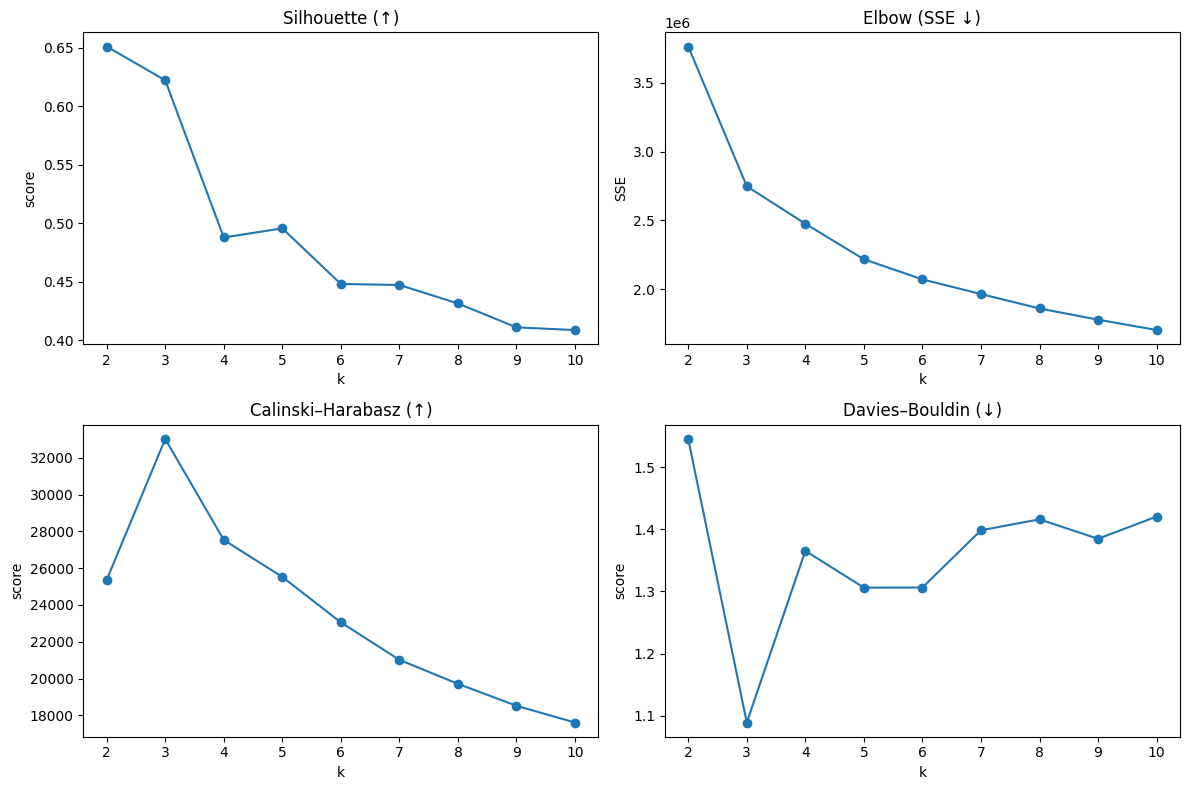

In [31]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


K_RANGE = range(2,11)
RND      = 42

sil, ch, db, sse = [], [], [], []
sample = np.random.default_rng(RND).choice(X_ok.shape[0], 20000, replace=False)

print("k | sil |   CH   |  DB  |   SSE ")
for k in K_RANGE:
    km = KMeans(k, n_init=30, max_iter=600, random_state=RND).fit(X_ok)
    lbl = km.labels_
    sil.append(silhouette_score(X_ok[sample], lbl[sample]))
    ch.append(calinski_harabasz_score(X_ok, lbl))
    db.append(davies_bouldin_score(X_ok, lbl))
    sse.append(km.inertia_)
    print(f"{k:2d}|{sil[-1]:.3f}|{ch[-1]:7.0f}|{db[-1]:5.2f}|{sse[-1]:8.0f}")

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(K_RANGE, sil, marker='o')
ax[0, 0].set_title('Silhouette (↑)')
ax[0, 0].set_xlabel('k')
ax[0, 0].set_ylabel('score')

ax[0, 1].plot(K_RANGE, sse, marker='o')
ax[0, 1].set_title('Elbow (SSE ↓)')
ax[0, 1].set_xlabel('k')
ax[0, 1].set_ylabel('SSE')

ax[1, 0].plot(K_RANGE, ch, marker='o')
ax[1, 0].set_title('Calinski–Harabasz (↑)')
ax[1, 0].set_xlabel('k')
ax[1, 0].set_ylabel('score')

ax[1, 1].plot(K_RANGE, db, marker='o')
ax[1, 1].set_title('Davies–Bouldin (↓)')
ax[1, 1].set_xlabel('k')
ax[1, 1].set_ylabel('score')

plt.tight_layout()
plt.show()


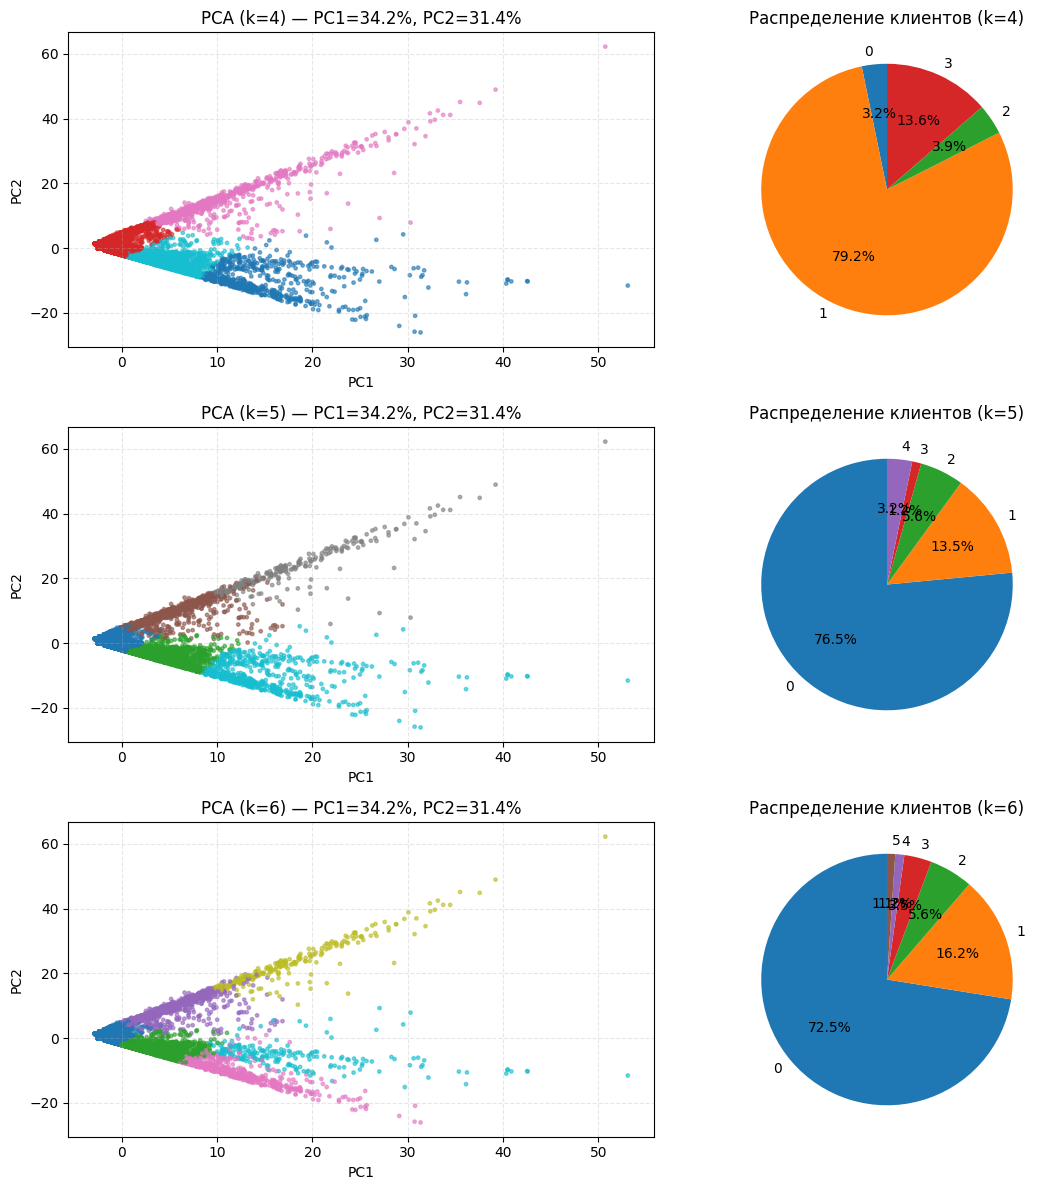

In [33]:
RND = 42
KS  = [4, 5, 6] # № кластеров
SAMPLE = 20000            # сколько точек на scatter
pca = PCA(n_components=2, random_state=RND)
coords = pca.fit_transform(X_ok)

rng   = np.random.default_rng(RND)
idx   = rng.choice(len(coords), SAMPLE, replace=False)
coords_s = coords[idx]

# --- готовим фигуру ------------------------------------------------
fig, axes = plt.subplots(len(KS), 2, figsize=(12, 4*len(KS)))

for row, k in enumerate(KS):
    km  = KMeans(k, n_init=30, max_iter=600, random_state=RND).fit(X_ok)
    labs_full = km.labels_
    labs_s    = labs_full[idx]

    # ---- scatter PCA ----
    ax_sc = axes[row, 0]
    sc = ax_sc.scatter(coords_s[:,0], coords_s[:,1],
                       c=labs_s, s=6, alpha=0.6, cmap='tab10')
    ax_sc.set_title(f"PCA (k={k}) — PC1={pca.explained_variance_ratio_[0]*100:.1f}%, "
                    f"PC2={pca.explained_variance_ratio_[1]*100:.1f}%")
    ax_sc.set_xlabel("PC1"); ax_sc.set_ylabel("PC2")
    ax_sc.grid(ls='--', alpha=0.3)

    # ---- pie chart ----
    ax_pie = axes[row, 1]
    counts = np.bincount(labs_full)
    labels = [str(i) for i in range(k)]
    ax_pie.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,
               colors=plt.cm.tab10.colors)
    ax_pie.set_title(f"Распределение клиентов (k={k})")

plt.tight_layout()
plt.show()

In [34]:
vit_ok['Кластер'] = KMeans(6, n_init=40, max_iter=700,
                           random_state=42).fit_predict(X_ok)


k | sil |  CH  |  DB  |   BIC   |   AIC
 2|0.524| 17147| 1.90|-3716163|-3717331
 3|0.408|  7558| 4.80|-5726802|-5728559
 4|0.292|  4516| 4.85|-7817796|-7820142
 5|0.244|  4882| 5.33|-7801447|-7804382
 6|0.122|  3502| 4.74|-9196759|-9200282
 7|0.068|  3940| 5.40|-9900643|-9904755
 8|0.051|  3345| 6.02|-10637968|-10642669
 9|0.007|  2958| 4.85|-11685423|-11690713
10|-0.099|  2226| 5.95|-12419280|-12425158


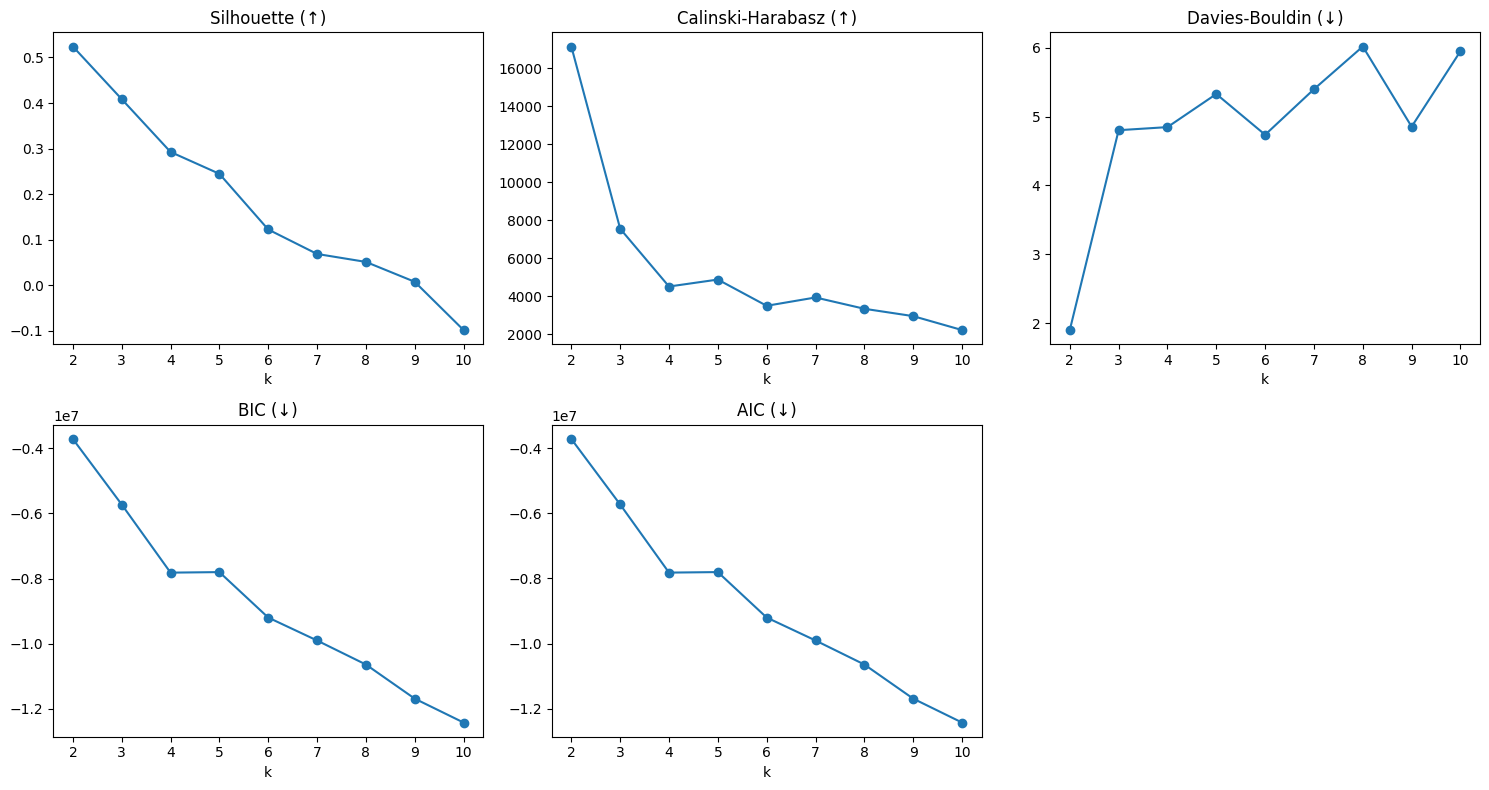

In [36]:
from sklearn.mixture import GaussianMixture


RND = 42
COMPONENTS = range(2, 11)           # будем тестировать 2‑10 компонент

sil, ch, db, bic, aic = [], [], [], [], []

sample = np.random.default_rng(RND).choice(X_ok.shape[0], 20000, replace=False)

print("k | sil |  CH  |  DB  |   BIC   |   AIC")
for k in COMPONENTS:
    gmm = GaussianMixture(n_components=k, covariance_type='diag',
                          random_state=RND, n_init=5).fit(X_ok)
    labels = gmm.predict(X_ok)
    sil.append(silhouette_score(X_ok[sample], labels[sample]))
    ch.append(calinski_harabasz_score(X_ok, labels))
    db.append(davies_bouldin_score(X_ok, labels))
    bic.append(gmm.bic(X_ok))
    aic.append(gmm.aic(X_ok))
    print(f"{k:2d}|{sil[-1]:.3f}|{ch[-1]:6.0f}|{db[-1]:5.2f}|{bic[-1]:8.0f}|{aic[-1]:8.0f}")

# --- графики для GMM ---
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

ax[0,0].plot(COMPONENTS, sil, 'o-'); ax[0,0].set_title('Silhouette (↑)'); ax[0,0].set_xlabel('k')
ax[0,1].plot(COMPONENTS, ch, 'o-');  ax[0,1].set_title('Calinski‑Harabasz (↑)'); ax[0,1].set_xlabel('k')
ax[0,2].plot(COMPONENTS, db, 'o-');  ax[0,2].set_title('Davies‑Bouldin (↓)');   ax[0,2].set_xlabel('k')

ax[1,0].plot(COMPONENTS, bic, 'o-'); ax[1,0].set_title('BIC (↓)'); ax[1,0].set_xlabel('k')
ax[1,1].plot(COMPONENTS, aic, 'o-'); ax[1,1].set_title('AIC (↓)'); ax[1,1].set_xlabel('k')

ax[1,2].axis('off')   # пустая ячейка для ровной сетки

plt.tight_layout()
plt.show()

In [37]:
BEST_K = 4
gmm = GaussianMixture(n_components=BEST_K, covariance_type='diag',
                      random_state=42, n_init=5).fit(X_ok)
vit_ok['EM_Кластер'] = gmm.predict(X_ok)

print('Размеры EM-кластеров:', np.bincount(vit_ok['EM_Кластер']))


Размеры EM-кластеров: [50873   694 24578  8447]


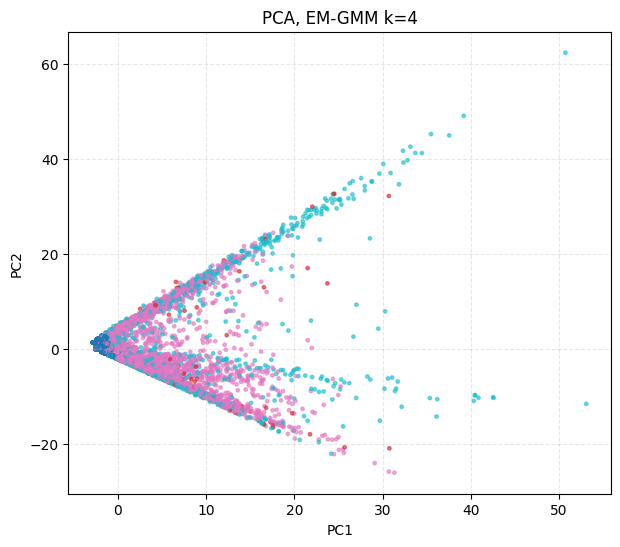

In [38]:
coords = PCA(n_components=2, random_state=42).fit_transform(X_ok)
idx = np.random.default_rng(42).choice(len(coords), 20000, replace=False)

plt.figure(figsize=(7,6))
plt.scatter(coords[idx,0], coords[idx,1],
            c=vit_ok['EM_Кластер'].values[idx],
            s=6, alpha=0.6, cmap='tab10')
plt.title(f"PCA, EM-GMM k={BEST_K}")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.grid(ls='--', alpha=0.3)
plt.show()


In [39]:
vit_ok

,ЧислоЗаказов,ОбщаяСуммаПокупок,ОбщееКоличествоТоваров,СуммаСкидки,СреднийЧек,СрКолТоваров_вЧеке,ДоляСкидки,G2_ДЕТСКОЕ ПИТАНИЕ,G2_ЖЕНСКИЕ ШТУЧКИ,G2_ИГРУШКИ,"G2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ",G2_КОСМЕТИКА/ГИГИЕНА,G2_КРУПНОГАБАРИТНЫЙ ТОВАР,G2_ОБУВЬ,G2_ПОДГУЗНИКИ,G2_СОПУТСТВУЮЩИЕ ТОВАРЫ,"G2_ТЕКСТИЛЬ, ТРИКОТАЖ",G2_ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,G2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ,G2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Pay_Безналичная,Pay_Наличная,FO_Other_FO,FO_ДФО,FO_ПФО,FO_СЗФО,FO_СКФО,FO_СФО,FO_УФО,FO_ЦФО,FO_ЮФО,Кластер,EM_Кластер
Телефон_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32555749-545749525150 .,1,1039.0,5,0.0,1039.0,5.0,0.0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,0,1,2
55494851-56495152535476,1,1630.0,1,0.0,1630.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
55525753-51504955564975,1,876.0,8,0.0,876.0,8.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2
55525753-51545355524977,1,1458.0,2,0.0,1458.0,2.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2
55525753-51555355565072,1,1258.0,1,0.0,1258.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495452-49485054525597,1,1520.0,17,0.0,1520.0,17.0,0.0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0,3,2
57495456-48525056575193,1,3178.0,3,0.0,3178.0,3.0,0.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,0,3,0,0,0
57545653-57554953575092,1,5476.0,13,0.0,5476.0,13.0,0.0,0,0,0,0,0,0,0,0,0,12,0,1,0,13,0,0,0,0,0,0,0,0,13,0,3,2


In [40]:
k_list = [4, 5, 6]

# ────────── K-means (добавим, если ещё нет) ──────────
for k in k_list:
    col = f'K{k}_Кластер'
    if col not in vit_ok.columns:
        vit_ok[col] = KMeans(k, n_init=40, max_iter=700,
                             random_state=RND).fit_predict(X_ok)
        print(f'K-means k={k} → добавлен столбец {col}')

# ────────── GMM / EM (добавим, если ещё нет) ─────────
for k in k_list:
    col = f'G{k}_Кластер'
    if col not in vit_ok.columns:
        gmm = GaussianMixture(n_components=k,
                              covariance_type='full',
                              init_params='kmeans',
                              n_init=10,
                              random_state=RND).fit(X_ok)
        vit_ok[col] = gmm.predict(X_ok)
        print(f'GMM k={k} → добавлен столбец {col}')


K-means k=4 → добавлен столбец K4_Кластер
K-means k=5 → добавлен столбец K5_Кластер
K-means k=6 → добавлен столбец K6_Кластер
GMM k=4 → добавлен столбец G4_Кластер
GMM k=5 → добавлен столбец G5_Кластер
GMM k=6 → добавлен столбец G6_Кластер


In [41]:
vit_ok

,ЧислоЗаказов,ОбщаяСуммаПокупок,ОбщееКоличествоТоваров,СуммаСкидки,СреднийЧек,СрКолТоваров_вЧеке,ДоляСкидки,G2_ДЕТСКОЕ ПИТАНИЕ,G2_ЖЕНСКИЕ ШТУЧКИ,G2_ИГРУШКИ,"G2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ",G2_КОСМЕТИКА/ГИГИЕНА,G2_КРУПНОГАБАРИТНЫЙ ТОВАР,G2_ОБУВЬ,G2_ПОДГУЗНИКИ,G2_СОПУТСТВУЮЩИЕ ТОВАРЫ,"G2_ТЕКСТИЛЬ, ТРИКОТАЖ",G2_ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,G2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ,G2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Pay_Безналичная,Pay_Наличная,FO_Other_FO,FO_ДФО,FO_ПФО,FO_СЗФО,FO_СКФО,FO_СФО,FO_УФО,FO_ЦФО,FO_ЮФО,Кластер,EM_Кластер,K4_Кластер,K5_Кластер,K6_Кластер,G4_Кластер,G5_Кластер,G6_Кластер
Телефон_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32555749-545749525150 .,1,1039.0,5,0.0,1039.0,5.0,0.0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,0,1,2,0,1,1,2,3,1
55494851-56495152535476,1,1630.0,1,0.0,1630.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3
55525753-51504955564975,1,876.0,8,0.0,876.0,8.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,1,0,0,2,3,1
55525753-51545355524977,1,1458.0,2,0.0,1458.0,2.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,1,0,0,0,3,0
55525753-51555355565072,1,1258.0,1,0.0,1258.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495452-49485054525597,1,1520.0,17,0.0,1520.0,17.0,0.0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0,3,2,0,1,3,2,3,1
57495456-48525056575193,1,3178.0,3,0.0,3178.0,3.0,0.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,3
57545653-57554953575092,1,5476.0,13,0.0,5476.0,13.0,0.0,0,0,0,0,0,0,0,0,0,12,0,1,0,13,0,0,0,0,0,0,0,0,13,0,3,2,3,4,3,2,3,1


In [43]:
# список «устаревших» колонок — удаляем, если есть
drop_cols = ['Кластер', 'EM_Кластер']
vit_ok = vit_ok.drop(columns=[c for c in drop_cols if c in vit_ok.columns])

# сохраняем обновлённую версию
vit_ok.to_csv('vitrina_clients_clusters_all.csv', index=True, encoding='utf-8')
print('устаревшие столбцы удалены; файл перезаписан.')


устаревшие столбцы удалены; файл перезаписан.


In [44]:
vit_ok

,ЧислоЗаказов,ОбщаяСуммаПокупок,ОбщееКоличествоТоваров,СуммаСкидки,СреднийЧек,СрКолТоваров_вЧеке,ДоляСкидки,G2_ДЕТСКОЕ ПИТАНИЕ,G2_ЖЕНСКИЕ ШТУЧКИ,G2_ИГРУШКИ,"G2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ",G2_КОСМЕТИКА/ГИГИЕНА,G2_КРУПНОГАБАРИТНЫЙ ТОВАР,G2_ОБУВЬ,G2_ПОДГУЗНИКИ,G2_СОПУТСТВУЮЩИЕ ТОВАРЫ,"G2_ТЕКСТИЛЬ, ТРИКОТАЖ",G2_ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,G2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ,G2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,Pay_Безналичная,Pay_Наличная,FO_Other_FO,FO_ДФО,FO_ПФО,FO_СЗФО,FO_СКФО,FO_СФО,FO_УФО,FO_ЦФО,FO_ЮФО,K4_Кластер,K5_Кластер,K6_Кластер,G4_Кластер,G5_Кластер,G6_Кластер
Телефон_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32555749-545749525150 .,1,1039.0,5,0.0,1039.0,5.0,0.0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,5,0,0,1,1,2,3,1
55494851-56495152535476,1,1630.0,1,0.0,1630.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3
55525753-51504955564975,1,876.0,8,0.0,876.0,8.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,0,2,3,1
55525753-51545355524977,1,1458.0,2,0.0,1458.0,2.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,0,0,3,0
55525753-51555355565072,1,1258.0,1,0.0,1258.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495452-49485054525597,1,1520.0,17,0.0,1520.0,17.0,0.0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,13,0,0,1,3,2,3,1
57495456-48525056575193,1,3178.0,3,0.0,3178.0,3.0,0.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,0,3,0,1,0,0,0,0,3
57545653-57554953575092,1,5476.0,13,0.0,5476.0,13.0,0.0,0,0,0,0,0,0,0,0,0,12,0,1,0,13,0,0,0,0,0,0,0,0,13,0,3,4,3,2,3,1


In [45]:
df

,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Количество,Цена,СуммаСтроки,Гео,СуммаУслуг,СуммаДоставки,КоличествоПроданоКлиенту,Телефон_new,СуммаБезСкидки,Скидка,ФО
0,3998972_TR,Частичный возврат,12098,12247.0,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,1,680.0,680.0,Москва,0,0,1,55574854-48574951555577,680.0,0.0,ЦФО
1,3999117_TR,Доставлен,4819,3759.0,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,1,379.0,379.0,Регионы,0,0,1,55575453-56535648535679,379.0,0.0,УФО
2,3999122_TR,Доставлен,3325,3325.0,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,1,3325.0,3325.0,Регионы,0,0,1,55574950-57515657535772,3325.0,0.0,Other_FO
4,3999411_TR,Доставлен,528,528.0,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,1,199.0,199.0,Регионы,0,0,1,55574854-56495552515179,199.0,0.0,ПФО
5,3999682_TR,К отгрузке,2962,2962.0,Наличная,Москва,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,ИГРУШКИ,"LEGO Duplo, КОНСТРУКТОР Лошадки, (20 дет.)",МГТ,1,719.0,719.0,Москва,0,0,1,55574851-53495753545674,719.0,0.0,ЦФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,4411156_TR,Принят в ПВЗ,3240,3240.0,Безналичная,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ КИТАЙ,КГТ,"BABYHIT, КОЛЯСКА (син/черн)",КГТ,1,3240.0,3240.0,Регионы,0,0,1,55574952-51535652495475,3240.0,0.0,СФО
691535,4411268_TR,Доставлен,1377,1377.0,Безналичная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"TOMY LAMAZE, КНИЖКА- шуршалка Пират Пит",МГТ,1,464.0,464.0,Москва,49,49,1,55575054-53545152544971,464.0,0.0,ЦФО
691536,4411571_TR,Доставлен,1098,2086.0,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, НАСАДКА для зубной щетки SonicPulsa...",МГТ,1,249.0,249.0,Регионы,0,0,1,55575448-49564957485078,249.0,0.0,ПФО
691537,4411571_TR,Доставлен,1098,2086.0,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, ЩЕТКА зубная эл. SonicPulsar CS-562...",МГТ,1,849.0,849.0,Регионы,0,0,1,55575448-49564957485078,849.0,0.0,ПФО


In [47]:
cluster_cols = ['K4_Кластер','K5_Кластер','K6_Кластер',
                'G4_Кластер','G5_Кластер','G6_Кластер']

df_full = df.merge(
            vit_ok[cluster_cols],
            left_on='Телефон_new',     # ключ в df
            right_index=True,          # индекс = Телефон_new в vit_ok
            how='left'
          )

print('Размер после merge:', df_full.shape)


Размер после merge: (403539, 29)


In [ ]:
#  CSV сжатый (совместим с Excel 2016+)
csv_name = 'transactions_clean_with_clusters.csv'
df_full.to_csv(csv_name, index=False, encoding='utf-8')


